# Dividir el dataset en conjunto de entrenamiento y conjunto de testing

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
fullpath= "../../Datasets/ads/Advertising.csv"

data= pd.read_csv(fullpath)

In [3]:
a= np.random.randn(len(data))

(array([ 3.,  7., 13., 31., 45., 41., 27., 23.,  9.,  1.]),
 array([-3.01082323, -2.43759324, -1.86436325, -1.29113326, -0.71790327,
        -0.14467328,  0.42855671,  1.00178669,  1.57501668,  2.14824667,
         2.72147666]),
 <BarContainer object of 10 artists>)

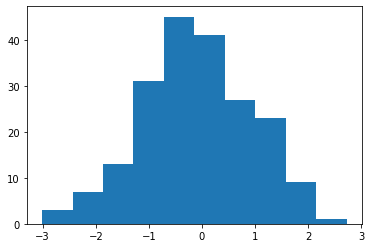

In [4]:
plt.hist(a)

In [5]:
#Separamos un 80% de los datos para el conjunto de entrenamiento y un 20% para el conjunto de testing aproximadamente.
check= (a<0.8)
training= data[check]
testing= data[~check]

In [6]:
len(training), len(testing)

(161, 39)

In [8]:
#Creamos un modelo en base a lo que vimos en el programa anterior (con las variables TV y Radio) y lo entrenamos con el 
#conjunto de training
lm= smf.ols(formula= "Sales~TV+Radio", data= data).fit()

In [9]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Fri, 08 Jul 2022   Prob (F-statistic):           4.83e-98
Time:                        19:56:14   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Validación del modelo con el conjunto de testing

In [10]:
sales_pred= lm.predict(testing)
sales_pred

2      12.337018
6      11.718212
10      7.035860
17     23.241076
22      6.514172
31     11.357918
33     18.833463
46      8.886450
47     21.699440
48     16.286903
49      8.181629
54     20.355124
55     21.308647
61     22.904187
75     11.909704
81     14.663881
107     7.113733
108     3.595686
111    21.123819
114    15.297256
115    12.937084
122    13.621365
125     9.129252
129     7.904018
132     8.418883
134    11.866030
137    20.877226
143     8.778621
146    15.279189
147    23.260388
155     5.289428
172     7.596578
175    24.783526
177    12.174924
178    16.013844
181    13.933696
184    18.537949
192     4.478859
194    16.463190
dtype: float64

In [11]:
SSD= sum((testing["Sales"]-sales_pred)**2)
SSD

119.10325193959142

In [12]:
RSE= np.sqrt(SSD/(len(testing)-2-1))
RSE

1.8189072722348025

In [13]:
sales_mean= np.mean(testing["Sales"])
error= RSE/sales_mean
error

0.13336601544868829